In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn import cluster
from time import time
from sklearn.preprocessing import StandardScaler

In [2]:
path30 = r'C:\Users\yuwan\Dropbox\Zotero\attachments\Ni et al_2020_A Novel Approach to Identifying Mantle‐Equilibrated Zircon by Using Trace.xlsx'
df = pd.read_excel(path30, header=1)
df.columns


Index(['CITATION', 'SAMPLE NAME', 'ZIRCONTYPE', 'HOSTROCKTYPE', 'HOSTROCKNAME',
       'HOSTROCKSILICA(WT%)', 'A/NK', 'P', 'Ti', 'Y', 'Nb', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf',
       'Th', 'U', 'LREE_I', '(Sm/La)_N', '(Lu/Gd)_N', 'Th/U', 'Th/Nb', 'U/Nb',
       'Ce/Ce*', 'Eu/Eu*', '(REE+Y)/P molar ratio', 'sum REE', '∆FMQ',
       'Ti-in-Zircon Temperature (℃)'],
      dtype='object')

In [3]:
cols = ['CITATION', 'ZIRCONTYPE', 
        'P', 'Ti', 'Y', 'Nb', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf',
       'Th', 'U']
df = df.loc[:, cols]
X = df.copy()

In [4]:
groups = X.pop('CITATION')
labels = X.pop('ZIRCONTYPE')
X = np.log(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
time0 = time()
estimator = LinearSVC()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, labels)
print(time() - time0)

c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\sv

5.64380145072937


c:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
selector.support_
selector.ranking_

array([21, 20,  5, 16, 14, 18, 13, 12, 10, 11,  9,  7,  1,  2,  3,  8,  4,
        6, 19, 15, 17])

In [7]:
elements = list(df.columns[2:])
ranks = []
for ele, rank in zip(elements, selector.ranking_):
    ranks.append((ele,rank))
sorted(ranks, key=lambda x:x[1])


[('Dy', 1),
 ('Ho', 2),
 ('Er', 3),
 ('Yb', 4),
 ('Y', 5),
 ('Lu', 6),
 ('Tb', 7),
 ('Tm', 8),
 ('Gd', 9),
 ('Sm', 10),
 ('Eu', 11),
 ('Nd', 12),
 ('Pr', 13),
 ('La', 14),
 ('Th', 15),
 ('Nb', 16),
 ('U', 17),
 ('Ce', 18),
 ('Hf', 19),
 ('Ti', 20),
 ('P', 21)]

In [8]:
df.describe()

,P,Ti,Y,Nb,La,Ce,Pr,Nd,Sm,Eu,...,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Th,U
count,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,...,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000
mean,654.363932,64.435983,2337.582291,96.318883,62.064816,172.845265,14.685794,84.744969,47.859458,16.206350,...,30.740148,293.036782,87.481120,349.053019,73.113224,707.865011,104.152033,9691.854394,1696.466691,1415.589398
std,1378.150876,301.687423,3660.673945,439.367148,461.673900,664.839221,59.503067,339.360733,145.311682,70.062923,...,73.257416,662.932711,157.406130,596.463591,123.082065,1256.285558,177.349347,3847.634823,6908.820539,3841.376332
min,1.010000,0.090000,9.000000,0.150000,0.000125,0.300000,0.003000,0.020000,0.040000,0.009715,...,0.070000,0.950000,0.250000,0.630000,0.100000,0.580000,0.128736,1525.504822,0.570000,1.950000
25%,149.000000,6.620000,708.000000,2.390000,0.075000,10.072283,0.137000,1.883726,3.530000,0.390000,...,6.120000,67.500000,25.180000,110.000000,23.500000,213.170187,34.300000,7862.560773,93.977111,145.000000
50%,245.000000,11.300000,1210.000000,4.800000,0.440000,20.406270,0.533000,6.358738,8.190000,0.960000,...,11.100000,122.700000,44.388202,187.600000,39.800000,379.653310,57.800000,9340.000000,183.143395,275.000000
75%,549.000000,21.450429,2328.000000,12.102643,5.030000,60.510000,2.660000,19.804683,21.810000,2.940000,...,23.900870,251.983955,86.744362,344.280881,71.567566,678.441189,101.000000,10999.000000,617.000000,799.372421
max,25161.000000,10063.000000,58015.000000,12317.000000,10110.000000,9000.000000,801.000000,6420.000000,1669.000000,1190.000000,...,1720.000000,15999.000000,3218.000000,9883.000000,1622.000000,13821.000000,1783.000000,74610.000000,89000.000000,31639.000000


<AxesSubplot:>

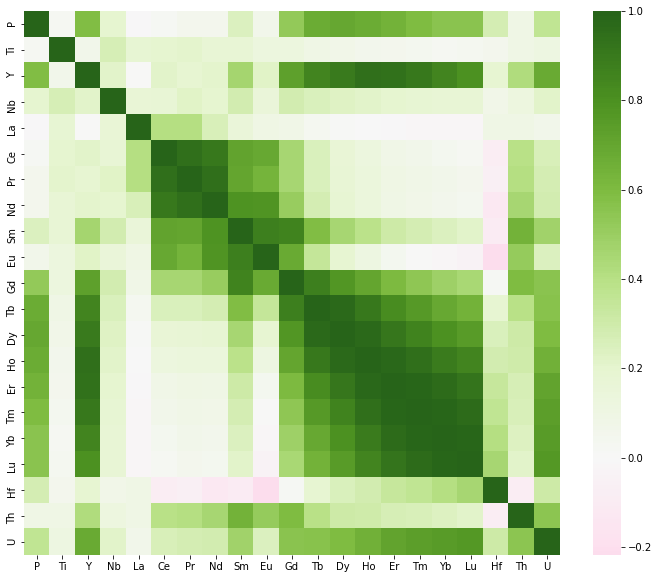

In [9]:
fig, g = plt.subplots(figsize=(12,10))
sns.heatmap(df.iloc[:, 2:].corr(), cmap='PiYG', ax=g, center=0,)

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: P

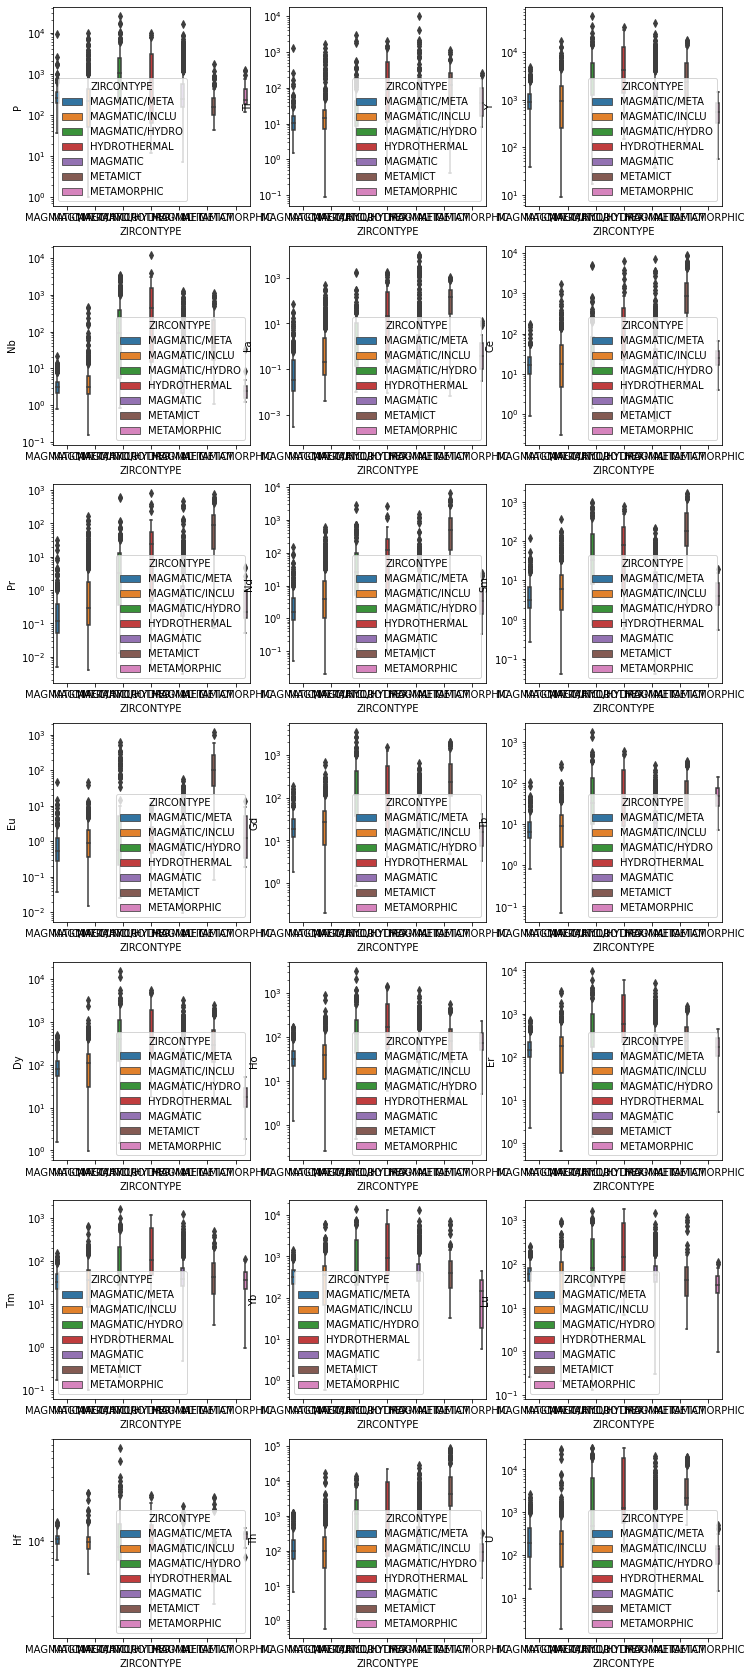

In [10]:
fig, axes = plt.subplots(7,3 ,figsize=(12,30))
for col, ax in zip(cols[2:], axes.flatten()):
    sns.boxplot('ZIRCONTYPE', y=col, data=df, hue="ZIRCONTYPE", ax=ax)
    ax.set_yscale('log')

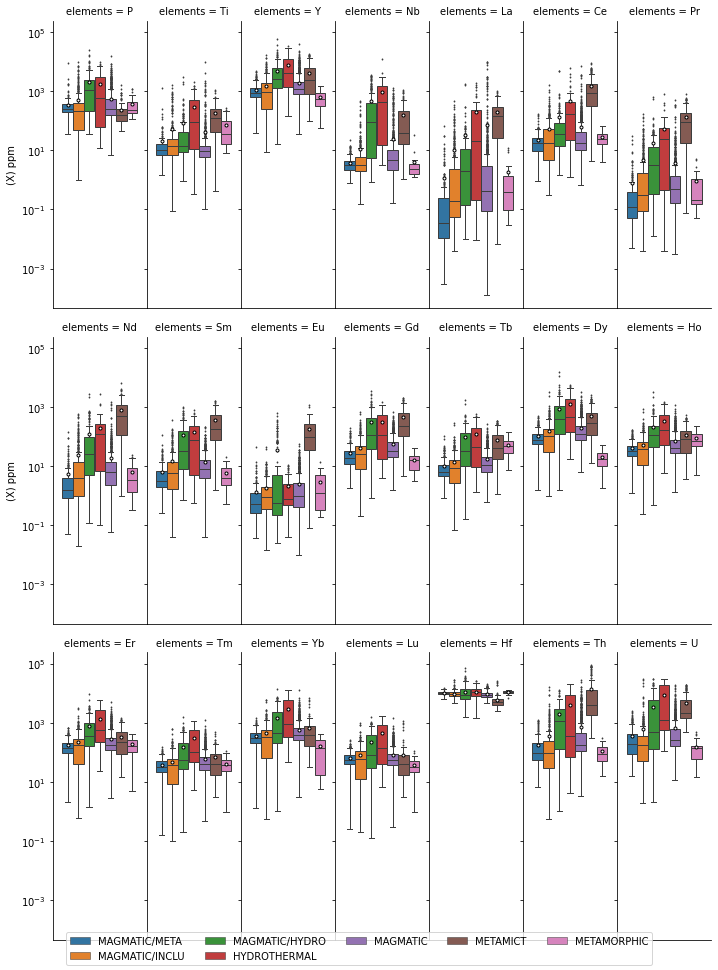

In [11]:
df_long = df.melt(id_vars=['CITATION', 'ZIRCONTYPE'],
                  var_name="elements", value_name="values")
df_long['X'] = 1
g = sns.catplot(data=df_long, x='X', y='values', kind='box', col='elements', hue='ZIRCONTYPE',
               fliersize=1, linewidth=1,showmeans=True, col_wrap=7, 
               meanprops={"marker":".","markerfacecolor":"white", "markeredgecolor":"k"},
               height=4.5, aspect=1.425/4.5, legend=False,legend_out=True)
for ax, ele in zip(g.axes.flatten(), cols[2:]):
    ax.set(yscale='log')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_xlabel('')
#     for i in sort:
#         if i[0] == ele:
#             ax.set_title(ele+f' (n={i[1]})')
    ax.tick_params(axis='x',which='both',direction='in', length=0., pad=-23, labelsize ='small')
g.axes[0].set_ylabel('(X) ppm')
g.axes[7].set_ylabel('(X) ppm')
plt.subplots_adjust(wspace = 0)
handles = g._legend_data.values()
labels = list(g._legend_data.keys())
# for i in range(len(labels)):
#     if labels[i] == 'IRG':
#         continue
#     labels[i] = labels[i].capitalize()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=5)

# Clustering

In [34]:
n_clusters = 2
k_means = cluster.MeanShift()
k_means.fit(X)

pre_labels = k_means.labels_
pre_labels
df['cluster'] = pre_labels
# df.to_csv('test1.csv')

[('HYDROTHERMAL', 77), ('MAGMATIC', 1137), ('MAGMATIC/HYDRO', 163), ('MAGMATIC/INCLU', 391), ('MAGMATIC/META', 223), ('METAMICT', 135), ('METAMORPHIC', 24)]
[('MAGMATIC', 3), ('MAGMATIC/HYDRO', 11), ('MAGMATIC/INCLU', 2), ('MAGMATIC/META', 1), ('METAMICT', 6)]


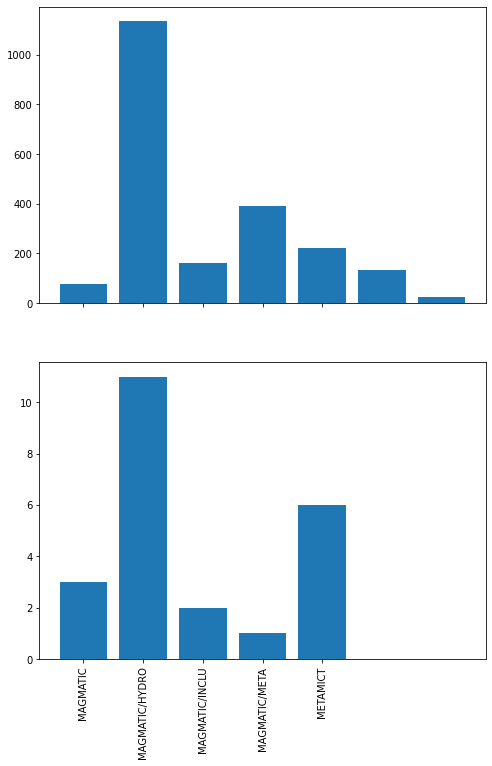

In [35]:
from typing import Counter

fig, axes = plt.subplots(n_clusters, 1, sharex=True, figsize=(8,12))
clusters = []
for i, ax, in zip(range(n_clusters), axes.flatten()):
    temdf = df.loc[df.cluster==i,:]
    clusters.append(temdf)
    c = Counter(temdf.ZIRCONTYPE)
    c_most = sorted(c.most_common())
    print(c_most)
    X_ = [x for x, y in c_most]
    Y_ = [y for x, y in c_most]
    ax.bar(X_, Y_)
    ax.tick_params(axis='x', labelrotation=90)
